In [1]:
%matplotlib inline

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
# By Alexandra Lee (July 2018) 
#
# Identify genes that are predictive using latent transformation vs linear transformation
#-------------------------------------------------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

randomState = 123
from numpy.random import seed
seed(randomState)

In [3]:
# load arguments
estimated_latent_file = os.path.join(os.path.dirname(os.getcwd()), "output", "oxygen_level", "estimated_test_t90_2layer_10latent.txt")
estimated_original_file = os.path.join(os.path.dirname(os.getcwd()), "output", "oxygen_level", "estimated_test_t90_original.txt")
obsv_file = os.path.join(os.path.dirname(os.getcwd()), "data", "oxygen_level", "train_minO2.txt")

# output
fig_file = os.path.join(os.path.dirname(os.getcwd()), "viz", "oxygen_level", "predictive_genes.png")

both_geneID_file = os.path.join(os.path.dirname(os.getcwd()), "output", "oxygen_level", "both_geneID.txt")
none_geneID_file = os.path.join(os.path.dirname(os.getcwd()), "output", "oxygen_level", "none_geneID.txt")
latent_geneID_file = os.path.join(os.path.dirname(os.getcwd()), "output", "oxygen_level", "latent_geneID.txt")
original_geneID_file = os.path.join(os.path.dirname(os.getcwd()), "output", "oxygen_level", "original_geneID.txt")


In [4]:
# read in data
estimated_latent_data = pd.read_table(estimated_latent_file, header = 0, sep = '\t', index_col = 0)
estimated_original_data = pd.read_table(estimated_original_file, header = 0, sep = '\t', index_col = 0)
obsv_data = pd.read_table(obsv_file, header = 0, sep = '\t', index_col = 0)

estimated_latent_data

,0,1,2,3,4,5,6,7,8,9,...,5539,5540,5541,5542,5543,5544,5545,5546,5547,5548
GSM1267087_HZI1950_Pae_G1a.CEL,0.686177,0.72357,0.437746,0.67743,0.439992,0.364563,0.50503,0.587372,0.641727,0.192211,...,0.35716,0.543123,0.601631,0.641289,0.669666,0.16932,0.427658,0.584807,0.765351,0.728943


In [5]:
estimated_original_data

,0,1,2,3,4,5,6,7,8,9,...,5539,5540,5541,5542,5543,5544,5545,5546,5547,5548
GSM1267087_HZI1950_Pae_G1a.CEL,0.733107,0.777055,0.32101,0.755155,0.419988,0.181194,0.364473,0.801218,0.595072,0.215486,...,0.477553,0.610651,0.628275,0.79114,0.779177,0.211457,0.451034,0.744925,0.80968,0.791791


In [6]:
obsv_data

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
GSM1267099_HZI1963_Pae_G1a.CEL,0.704391,0.721766,0.394952,0.674845,0.428068,0.356489,0.272953,0.656824,0.653714,0.193083,...,0.547198,0.627692,0.66225,0.780148,0.756383,0.270491,0.528961,0.696972,0.844712,0.787467


In [7]:
# Latent space residuals 

# Format
estimated_latent_df = pd.DataFrame(estimated_latent_data.values.transpose(), index = obsv_data.columns, columns=['estimated'])
obsv_df = pd.DataFrame(obsv_data.values.transpose(), index = obsv_data.columns, columns = ['observed'])

# Join 
X = pd.merge(estimated_latent_df, obsv_df, left_index=True, right_index=True)

# Residuals: observed - estimated
X['residuals_latent'] = abs(X['observed']-X['estimated'])
X.head(5)

# Mean and stdev of residuals
#residual_mean = X['residuals'].values.mean()
#residual_std = X['residuals'].values.std()

#print("Mean of residuals is: {} \n Standard deviation of residuals is: {}".format(residual_mean, residual_std))

# Identify those genes that have a residual that are less than 1 std from mean
# Genes that are predictive using latent space
#threshold = residual_std*3
#latent_predictive_geneID = X.index[X['residuals']>= threshold].tolist()
#latent_predictive_geneID

,estimated,observed,residuals_latent
PA0001,0.686177,0.704391,0.018214
PA0002,0.723570,0.721766,0.001804
PA0003,0.437746,0.394952,0.042794
PA0004,0.677430,0.674845,0.002585
PA0005,0.439992,0.428068,0.011924


In [8]:
# Linear space residuals 

# Format
estimated_original_df = pd.DataFrame(estimated_original_data.values.transpose(), index = obsv_data.columns, columns=['estimated'])
obsv_df = pd.DataFrame(obsv_data.values.transpose(), index = obsv_data.columns, columns = ['observed'])

# Join 
Y = pd.merge(estimated_latent_df, obsv_df, left_index=True, right_index=True)

# Residuals: observed - estimated
Y['residuals_original'] = abs(Y['observed']-Y['estimated'])
Y.head(5)

# Mean and stdev of residuals
#residual_mean = Y['residuals'].values.mean()
#residual_std = Y['residuals'].values.std()

#print("Mean of residuals is: {} \n Standard deviation of residuals is: {}".format(residual_mean, residual_std))

# Identify those genes that have a residual that are exceed 3 std from mean 
# Genes that are not predictive using linear space
#threshold = residual_std*3
#linear_notPredictive_geneID = X.index[X['residuals']>= threshold].tolist()
#linear_notPredictive_geneID

,estimated,observed,residuals_original
PA0001,0.686177,0.704391,0.018214
PA0002,0.723570,0.721766,0.001804
PA0003,0.437746,0.394952,0.042794
PA0004,0.677430,0.674845,0.002585
PA0005,0.439992,0.428068,0.011924


In [9]:
# Join 
Z = pd.merge(X, Y, left_index=True, right_index=True)
Z.head(5)

,estimated_x,observed_x,residuals_latent,estimated_y,observed_y,residuals_original
PA0001,0.686177,0.704391,0.018214,0.686177,0.704391,0.018214
PA0002,0.723570,0.721766,0.001804,0.723570,0.721766,0.001804
PA0003,0.437746,0.394952,0.042794,0.437746,0.394952,0.042794
PA0004,0.677430,0.674845,0.002585,0.677430,0.674845,0.002585
PA0005,0.439992,0.428068,0.011924,0.439992,0.428068,0.011924


In [10]:
# Threshold
# Set threshold based on the dropoff after the shoulder from manual visual inspection
latent_threshold = 0.03
original_threshold = 0.03

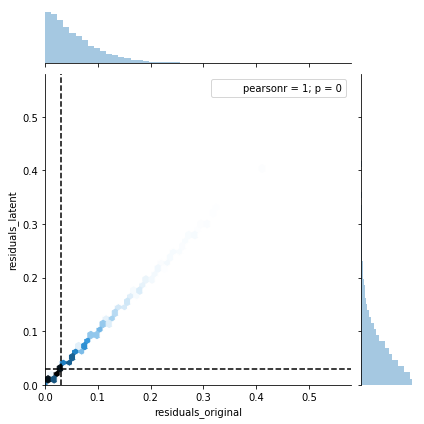

In [11]:
# Plot
fg=sns.jointplot(x='residuals_original', y='residuals_latent', data=Z, kind='hex');
fg.ax_joint.axhline(y=latent_threshold, color='k', linestyle='--')
fg.ax_joint.axvline(x=original_threshold, color='k', linestyle='--',)
fg.savefig(fig_file)

In [12]:
# Intersection of lists
# Genes that are predictive in latent space and NOT predictive in linear space

latent_predictive = Z.index[Z['residuals_latent'] < latent_threshold].tolist()
latent_notPredictive = Z.index[Z['residuals_latent'] > latent_threshold].tolist()
original_predictive = Z.index[Z['residuals_original'] < original_threshold].tolist()
original_notPredictive = Z.index[Z['residuals_original'] > original_threshold].tolist()

both_geneID = list(set(latent_predictive) & set(original_predictive))
none_geneID = list(set(latent_notPredictive) & set(original_notPredictive))
latent_geneID = list(set(latent_predictive) & set(original_notPredictive))
original_geneID = list(set(latent_notPredictive) & set(original_predictive))


print("Number of genes that are predictive in both spaces is {}".format(len(both_geneID)))
print("Number of genes that are predictive in neither space is {}".format(len(none_geneID)))
print("Number of genes that are predictive in latent space is {}".format(len(latent_geneID)))
print("Number of genes that are predictive in original space is {}".format(len(original_geneID)))

#linear_notPredictive_geneID = X.index[X['residuals']>= threshold].tolist()
#target_geneID = list(set(latent_predictive_geneID) & set(linear_notPredictive_geneID))
#print("Number of target genes is {}".format(len(target_geneID)))

# output list of genes to file
pd.DataFrame(both_geneID).to_csv(both_geneID_file, sep='\t')
pd.DataFrame(none_geneID).to_csv(none_geneID_file, sep='\t')
pd.DataFrame(latent_geneID).to_csv(latent_geneID_file, sep='\t')
pd.DataFrame(original_geneID).to_csv(original_geneID_file, sep='\t')

Number of genes that are predictive in both spaces is 1951
Number of genes that are predictive in neither space is 3598
Number of genes that are predictive in latent space is 0
Number of genes that are predictive in original space is 0
